In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#first lets confirm eig function
a = np.array([[504, 360, 180],[360, 360, 0],[180, 0, 720]])

(array([ 44.81966028, 910.06995304, 629.11038668]), array([[ 0.6487899 , -0.65580225, -0.3859988 ],
       [-0.74104991, -0.4291978 , -0.51636642],
       [-0.17296443, -0.62105769,  0.7644414 ]]))


[[3 2 1]
 [2 2 0]
 [1 0 4]]
Total trace: 9.000000000000004
Total variance explained by feature 1 and 2: 0.9632310098091431
[0.33092091 5.14510269 3.5239764 ]
[[ 0.63117897 -0.67931306 -0.37436195]
 [-0.75632002 -0.43198148 -0.49129626]
 [-0.17202654 -0.59323331  0.7864357 ]]


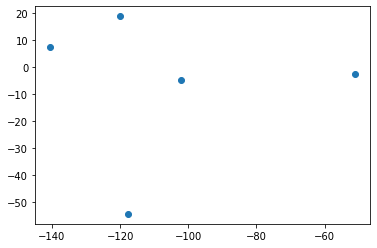

In [117]:
## create the data - for now hard code the process
a = np.array([[90, 60, 90], [90, 90, 30], [60, 60, 60], [60, 60, 90], [30, 30, 30]])
a2 = np.array([[90, 60, 90], [90, 90, 30], [60, 60, 60], [60, 60, 90], [30, 30, 30]])

r, c = a.shape
mu = [np.mean(a[:, i]) for i in range(c)]
std = [np.std(a[:, i]) for i in range(c)]

for i in range(c):
    a2[:,i] = (a2[:, i] - mu[i])/std[i]
cov2 = np.matmul(a2.T, a2)

#now calculate the covariance between columns
cov = np.zeros((c,c))
for i in range(c):
    for k in range(c):
        p1 = (a[:, i] - mu[i])*(a[:, k] - mu[k])
        cov[i,k] = np.sum(p1)/(r)
        
#once covariance is calculated, calculates eigs
eval_, evect_ = np.linalg.eig(cov2) 
eval_sort, evect_sort = sorted(eval_, reverse=True), np.zeros((c,c))

for i in range(len(eval_sort)):
    evect_sort[:,i] = evect_[:, np.where(eval_ == eval_sort[i])[0][0]]


print("Total trace: "+str(np.sum(eval_)))
print("Total variance explained by feature 1 and 2: "+str(np.sum(eval_[1:3])/np.sum(eval_)))
#now take the k vectors. here set k to 2
#collect the 2d points
pts = []
for i in range(r):
    pts.append(np.matmul(evect_sort[:, 0:2].T, a[i, :]))
pts = np.array(pts)
plt.scatter(pts[:,0], pts[:,1])



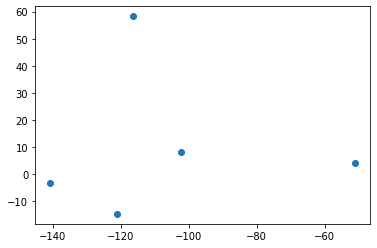

In [102]:
import sklearn.decomposition as decomp
pca = decomp.PCA(n_components = 2, svd_solver='full')
pca.fit(a)
x, y = [], []
for row in range(r):
    y.append(np.dot(a[row, :], pca.components_[1]))
    x.append(np.dot(a[row, :], pca.components_[0]))
    
plt.scatter(x,y)

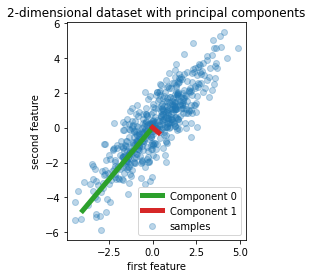

[-2.84888139e-01 -1.52526753e+00  6.47110266e-01  9.50158354e-02
 -2.77248546e-01 -9.85984424e-01 -8.83951588e-02 -2.29464636e-01
  1.27164875e-01  5.75936427e-01 -4.22524823e-01  4.95792006e-01
  9.67030698e-01  1.26402423e-01 -1.00714092e+00 -2.57316410e-01
  1.34841070e+00 -1.03140314e-01 -8.23956897e-01  2.07774068e-01
  9.69912000e-01 -1.30764388e+00  3.00683712e-01 -5.16655171e-01
  1.56784450e-01 -2.54959951e-01  8.03560966e-01 -2.89848920e-01
 -2.05361246e-01  2.50649465e-01  2.48790972e-01  1.17546316e+00
  2.70692583e-01 -3.00558247e-01 -2.80301928e-02 -9.30924604e-02
  8.27260993e-01  4.60591059e-01  3.98863435e-01 -3.55813309e-02
 -6.00870203e-01  1.03669219e+00 -1.29564111e+00  1.12560488e-01
 -7.05650536e-01 -8.24676660e-01 -6.63031254e-01 -4.81306427e-01
 -1.20949340e+00 -2.73231340e-01  8.97881259e-01 -6.46476852e-01
 -1.30699915e+00  5.09442956e-01 -1.01776964e+00 -6.28295987e-01
 -1.28673167e+00 -5.41320731e-01  9.75119540e-02 -6.29366039e-01
  7.41560503e-01 -9.00592

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()

print(X.dot(pca.components_[1]))

In [198]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("./data.csv")

#step 1 compte the means, std, and standardize
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df = df.drop(columns=["date"])

df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,61211,4,0,0,71.76,0,0,8,17
1,45,62414,4,0,0,71.76,0,0,8,17
2,40,63015,4,0,0,71.76,0,0,8,17
3,44,63616,4,0,0,71.76,0,0,8,17
4,45,64217,4,0,0,71.76,0,0,8,17


In [199]:

y = df["number_people"]
df = df.drop(columns=["number_people", "hour"])
corr = df.corr()


<AxesSubplot:>

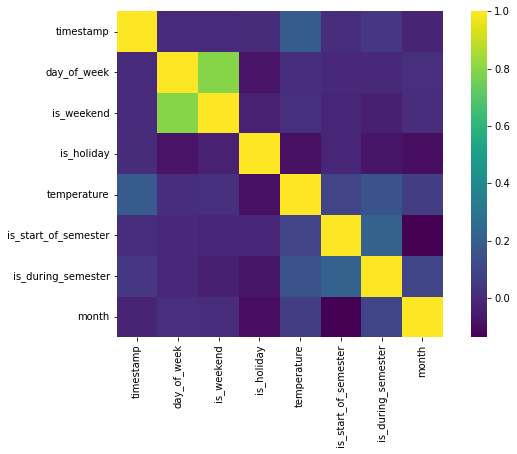

In [200]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True, cmap="viridis")

timestamp               1.801810
is_weekend              1.388892
is_holiday              1.159516
temperature             1.061487
month                   0.914863
is_during_semester      0.773454
is_start_of_semester    0.693393
day_of_week             0.206714
dtype: float64
[[-0.00270019 -0.70098602  0.09997874 -0.03424644]
 [ 0.0016761   0.70538372 -0.03886796 -0.01833923]
 [ 0.33049095 -0.02946977 -0.27125952  0.55818395]
 [-0.04181004 -0.07155975 -0.3842829   0.0942865 ]
 [-0.74686178 -0.01657005 -0.26713485 -0.32997317]
 [ 0.16893614  0.006215    0.01960288 -0.11691161]
 [ 0.54835704 -0.01228253 -0.16880427 -0.74485235]
 [-0.0444991   0.06781657  0.81669962 -0.02599889]]


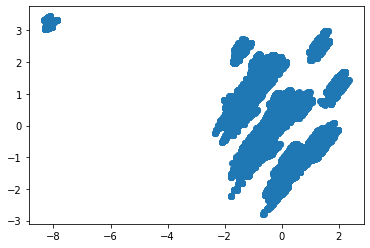

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X=scaler.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_mean = np.mean(X)

cov = (X-X_mean).T.dot((X-X_mean))/(X.shape[0]-1)
e_vals, e_vects = np.linalg.eig(cov)

evals_series = pd.Series(e_vals)
evals_series.index = df.columns
evals_series = evals_series.sort_values(ascending=False)
eigens = [(e_vals[i], e_vects[i]) for i in range(len(e_vals))]
eigens.sort(key=lambda x: x[0], reverse=True)

print(evals_series)

"""eigs_series = pd.Series(e_vals, index = df.columns)
eigs_series = eigs_series.sort_values(ascending=False)
print(eigs_series.iloc[0:4].index)"""

w_ = [eigens[i][1].reshape(8,1) for i in range(4)]
W = np.hstack(w_)

print(W)
Y = X.dot(W)

plt.scatter(Y[:,2], Y[:,3])


Text(0.5, 0, 'Eigen Value')

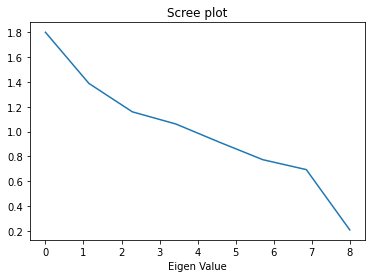

In [262]:

plt.plot(np.linspace(0,8, 8), evals_series)
plt.title("Scree plot")
plt.xlabel("Eigen Value")

In [ ]:
components = eigens[0:4]

[0.22522259 0.17360876 0.14493711 0.13268372 0.11435603 0.09668017
 0.08667277 0.02583886]


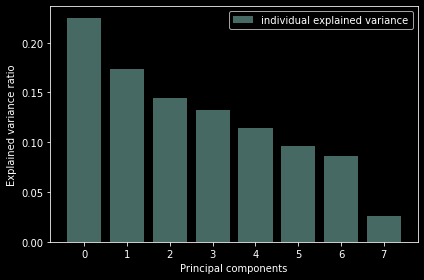

In [184]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

[0.22522259 0.17360876 0.14493711 0.13268372 0.11435603]


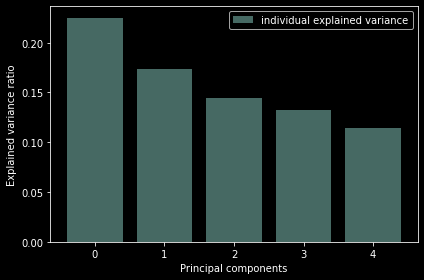

In [189]:
pca = PCA(n_components=5)
df_new = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()